In [1]:
import pandas as pd

books_df = pd.read_csv('Book&rating.csv')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [3]:
subsample_books = books_df.sample(n=20,random_state=42)

Make Rating Category

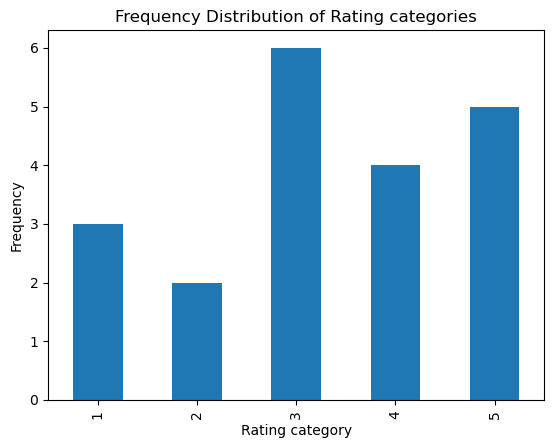

        User-ID        ISBN  Book-Rating  \
107209    41841  0140287442            6   
127762    22022  0812694333            4   
45624     37644  006092988X           10   
165014    76151  0671737791           10   
145873   108405  0399149392            8   

                                     Book-Title    Book-Author  \
107209                           dreamed africa  kuki gallmann   
127762              simpson philosophy oh homer  william irwin   
45624                       tree grows brooklyn    betty smith   
165014                                    bride  julie garwood   
145873  chesapeake blue quinn brother hardcover    nora robert   

        Year-Of-Publication                 Book-Publisher  \
107209                 2000                   penguin book   
127762                 2001  open court publishing company   
45624                  1998                      perennial   
165014                 1991                    pocket star   
145873                 2002 

In [4]:
subsample_books['Rating-Category'] = pd.cut(subsample_books['Book-Rating'], 
                                    bins=[0, 6, 7, 8, 9,10], 
                                    labels=[1, 2, 3, 4, 5], 
                                    right=True)
rating_counts = subsample_books['Rating-Category'].value_counts().sort_index()
rating_counts.plot(kind='bar')
# Set plot title and labels
plt.title('Frequency Distribution of Rating categories')
plt.xlabel('Rating category')
plt.ylabel('Frequency')
# Display the plot
plt.show()
# Display the updated DataFrame
print(subsample_books.head())

Regresson

In [5]:
x = subsample_books.drop(columns=['Book-Rating', 'Rating-Category'])
y = subsample_books['Book-Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

linear_reg= LinearRegression()
linear_scores = cross_val_score(linear_reg, x, y, cv= 5, scoring= 'neg_mean_squared_error')
linear_r2_scores = cross_val_score(linear_reg, x ,y, cv=5, scoring = 'r2')
linear_rmse_scores= (-linear_scores)**0.5

print('Linear Regression Cross-Validation RMSE Scores:')
print(linear_rmse_scores)
print('Linear Regression Mean RMSE:', linear_rmse_scores.mean())
print('Linear Regression Cross-Validation R^2 Scores:')
print(linear_r2_scores)
print('Linear Regression Mean R^2:', linear_r2_scores.mean())

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_base.py", line 648, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '067100042X'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_base.py", line 648, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '006092988X'


In [ ]:
# Initialize Decision Tree Regression model
dt_reg= DecisionTreeRegressor(random_state=42)

# Cross-validation for Decision Tree Regression
dt_scores = cross_val_score(dt_reg, x, y, cv=5,scoring='neg_mean_squared_error')
dt_r2_scores =cross_val_score(dt_reg, x, y, cv=5,scoring='r2')
dt_rmse_scores =(-dt_scores)**0.5
print('Decision Tree Regression Cross-Validation RMsE Scores:')
print(dt_rmse_scores)
print('Decision Tree Regression Mean RMSE:', dt_rmse_scores.mean())
print('Decision Tree Regression Cross-Validation R^2 Scores:')
print(dt_r2_scores)
print('Decision Tree Regression Mean R^2:', dt_r2_scores.mean())